# Funciones de transición

Las funciones de transición modelan el comportamiento de la **compuertas** en los canales de iones de las neuronas en términos de probabilidades.  Para cada compuerta se utilizan dos funciones que dependen del voltaje de polarización $V$ de la membrana:

* $\alpha(V)$ probabilidad de que una compuerta transite de cerrada a abierta.
* $\beta(V)$ probabilidad de que una compuerta transite de abierta a cerrada.

Experimentalmente se ha observado que su forma general es:
\begin{align}
  \alpha(V) \text{ ó } \beta(V)  = \frac{A + BV}{C + H e^{\left(\frac{V+D}{F}\right)}}
\end{align}

donde $V$ está medido con respecto al potencial de reposo $V_r$ y los coeficientes $A$, $B$, $C$, $D$, $F$ y $H$ varían para diferentes tipos de canales.

## Canales de potasio

Los valores medidos por Hodkin y Huxley para la compuerta de **potasio (K)**, fueron:

\begin{align}
  \alpha_n(V) &= \frac{0.01(10 - V)}{e^{\left(\frac{10-V}{10}\right)} - 1} & \beta_n(V) &= 0.125 e^{-\frac{V}{80}}
\end{align}

con las constantes en milivolts (mV).

## Cálculo numérico
Para simular el comportamiento de la neurona es necesario calcular cuidadosamente el valor de estas funciones. Dessarrollemos el ejemplo de la compuerta de potasio. Particularmente, hay un problema cuando $V = 10$ pues la función $\alpha_n$ está indefinida. Para que la simulación no falle al acercarse a este valor, utilizamos la regla de L'Hôpital, que nos dice que el valor al cual tiende esta función en el límite cuando $V \rightarrow 10$.

### Regla de L'Hôpital

$$lim_{x \rightarrow 1} \frac{f(x)}{g(x)} = \frac{f'(x)}{g'(x)} $$

Aplicada a la función $\alpha_n$:

\begin{align}
  \alpha_n(10) &= \frac{-0.01}{e^{\left(\frac{10-V}{10}\right)}(-0.1)}
               = \frac{-0.01}{-0.1} = 0.1
\end{align}


# Implementación

Para implementar el cálculo de esta función se debe considerar el valor donde queda indeterminada
 como un caso especial y ser devuelto manualmente, en lugar de usar la función original.
 

In [13]:
using Plots
using LaTeXStrings


In [11]:
"""
Función para calcular la probabilidad de que la compuerta esté cerrada
de acuerdo al voltaje pasado como argumento.
"""
function alpha_n(V)
    function _alpha_n(V)
    # Fórmula genérica para calcular alfa cuando V != 10
    A = 0.1
    B = -0.01
    C = -1
    D = -10
    F = -10
    H = 1
    return (A + B * V) / (C + H * exp((V + D) / F))
    end
    
    epsilon = 0.00001
    
    # Si se trata de un arreglo, se aplica la función a cada elemento
    if typeof(V) <: AbstractArray
        # Copiamos el arreglo
        alpha_n_values = copy(V)
        # Verificamos si cada valor del arreglo esta cerca de 10
        # dentro de un rango de tamaño epsilon
        close_enough = abs.(V .- 10) .< epsilon
        # Sustituimos los valores que cumplen la condición
        alpha_n_values[close_enough] = _alpha_n.(alpha_n_values[close_enough])
        alpha_n_values[]
        return _alpha_n.(V)
    else
        if V == 10
            return 0.1
        else
            return _alpha_n(V)
        end
    end
end

alpha_n.(10)
alpha_n.([100, 20, 30])

3-element Vector{Float64}:
 0.9001110825323516
 0.15819767068693266
 0.2313035285499331

Ahora podemos ver como, en la vecindad de $V = 10$ la función es continua hasta una precisión de $\varepsilon = 0.00001$.

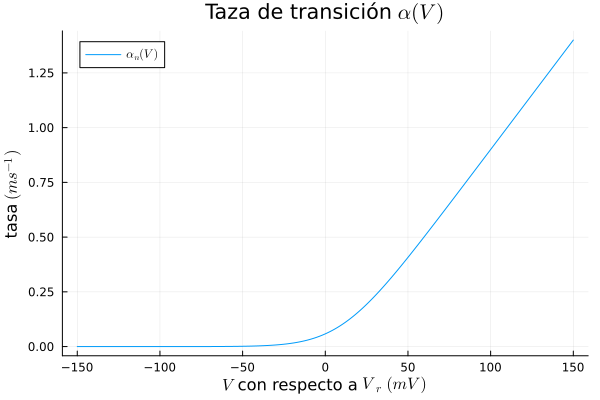

In [21]:
function plot_alpha_n()
    V = -150:150
    alpha_n_values = alpha_n.(V)
    plot(
        V, 
        alpha_n_values, 
        label="\$\\alpha_n(V)\$", 
        xlabel="\$V\$ con respecto a \$V_r\$ \$(mV)\$", 
        ylabel="tasa \$(ms^{-1})\$", 
        title="Taza de transición \$\\alpha(V)\$"
    )
end

plot_alpha_n()

El caso para $\beta$ es más sencillo, pues no hay discontinuidad.

In [17]:
"""
Devuelve el valor de beta para el canal de sodio.
"""
beta_n(V) = 0.125 * exp(- V / 80)


beta_n

Ahora es interesante observar el comportamiento de ambas probabilidades para los mismos voltajes.

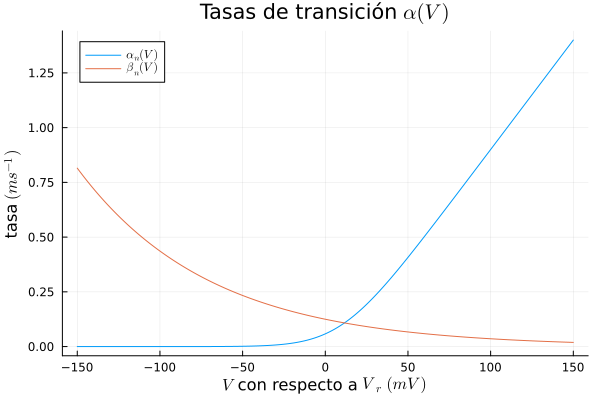

In [22]:
"""
Grafica las funciones de transición para el potasio.
"""
function plot_Na()
    V = -150:150
    alpha_n_values = alpha_n.(V)
    beta_n_values = beta_n.(V)
    plot(
        V, 
        alpha_n_values, 
        label="\$\\alpha_n(V)\$", 
        xlabel="\$V\$ con respecto a \$V_r\$ \$(mV)\$", 
        ylabel="tasa \$(ms^{-1})\$",
        title="Tasas de transición \$\\alpha(V)\$"
    )
    plot!(
        V, 
        beta_n_values, 
        label="\$\\beta_n(V)\$"
    )
end

plot_Na()

Nótese cómo a voltajes bajos, la probabilidad de que la compuerta se cierre es más alta, mientras que a voltajes altos, lo más probable es que se abra.